# Practice on Life Expectancy data by WHO from 2000 to 2015
Dataset retrieved from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

## Importing libraries for work

In [198]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for mathematical computations and storing objects as arrays
import numpy as np

# Import pyplot for plotting simple graphs and charts
import matplotlib.pyplot as plt

# Import seaborn for plotting higher level charts for further data visualisation
import seaborn as sns

# Import functions from sklearn for model development and evaluation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix


## Importing data as a csv file and initial inspection of data

In [200]:
life_exp = pd.read_csv('Life Expectancy Data.csv')

# View first few entries of dataset
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [201]:
# Information about the dataset including number of entries, column names and data types
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### There are 2938 entries in total, with some columns containing null values like Life expectancy, adult mortality, alcohol and others. The entries with null values for life expectancy can be removed prior to model development in predicting life expectancy. Most variables are numerical, only country and status are categorical. Status can be converted into numerical values by one hot encoding. 

In [203]:
# Checking column names
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [204]:
# Renaming column names to be simpler
life_exp.rename(columns = {'Life expectancy ': 'LifeExp', 'Adult Mortality': 'AdultM', 'infant deaths': 'InfantD', 'percentage expenditure':'%Expen', 'Hepatitis B':'HepB', 'Measles ':'Measles', ' BMI ':'BMI', 'under-five deaths ':'ChildD', 'Total expenditure':'TotalExpen', 'Diphtheria ':'Diph', ' HIV/AIDS':'HIV/AIDS', ' thinness  1-19 years':'thin 10-19', ' thinness 5-9 years':'thin 5-9', 'Income composition of resources': 'HDI'}, inplace=True)
life_exp.columns

Index(['Country', 'Year', 'Status', 'LifeExp', 'AdultM', 'InfantD', 'Alcohol',
       '%Expen', 'HepB', 'Measles', 'BMI', 'ChildD', 'Polio', 'TotalExpen',
       'Diph', 'HIV/AIDS', 'GDP', 'Population', 'thin 10-19', 'thin 5-9',
       'HDI', 'Schooling'],
      dtype='object')

In [205]:
# Description of the numerical variables in the dataset
life_exp.describe()

,Year,LifeExp,AdultM,InfantD,Alcohol,%Expen,HepB,Measles,BMI,ChildD,Polio,TotalExpen,Diph,HIV/AIDS,GDP,Population,thin 10-19,thin 5-9,HDI,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [206]:
# Description of the categorical variables in the dataset
life_exp.describe(include=object)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [207]:
# Number of null values for the variables
life_exp.isnull().sum()

Country         0
Year            0
Status          0
LifeExp        10
AdultM         10
InfantD         0
Alcohol       194
%Expen          0
HepB          553
Measles         0
BMI            34
ChildD          0
Polio          19
TotalExpen    226
Diph           19
HIV/AIDS        0
GDP           448
Population    652
thin 10-19     34
thin 5-9       34
HDI           167
Schooling     163
dtype: int64

## Dealing with null values

#### Since the null values only exist in the numerical variables, we can replace use the mean values of each column to replace the null values for simplicity. HepB, GDP and Population columns are dropped as they have too many null values (>10%). However, the entries will null life expectancy will be removed since it is the variable that is being predicted here.

In [210]:
# Filtering out entries with null life expectancy 
life_exp = life_exp[life_exp['LifeExp'].notnull()]
life_exp.isnull().sum()

Country         0
Year            0
Status          0
LifeExp         0
AdultM          0
InfantD         0
Alcohol       193
%Expen          0
HepB          553
Measles         0
BMI            32
ChildD          0
Polio          19
TotalExpen    226
Diph           19
HIV/AIDS        0
GDP           443
Population    644
thin 10-19     32
thin 5-9       32
HDI           160
Schooling     160
dtype: int64

In [211]:
# Dropping columns with too many null values
life_exp.drop(columns=['HepB','GDP','Population'], inplace=True)
life_exp.isnull().sum()

Country         0
Year            0
Status          0
LifeExp         0
AdultM          0
InfantD         0
Alcohol       193
%Expen          0
Measles         0
BMI            32
ChildD          0
Polio          19
TotalExpen    226
Diph           19
HIV/AIDS        0
thin 10-19     32
thin 5-9       32
HDI           160
Schooling     160
dtype: int64

In [212]:
# Replacing null values with mean values of each column
life_exp['Alcohol'].replace(np.nan,life_exp['Alcohol'].mean(),inplace=True)
life_exp['BMI'].replace(np.nan,life_exp['BMI'].mean(),inplace=True)
life_exp['Polio'].replace(np.nan,life_exp['Polio'].mean(),inplace=True)
life_exp['TotalExpen'].replace(np.nan,life_exp['TotalExpen'].mean(),inplace=True)
life_exp['Diph'].replace(np.nan,life_exp['Diph'].mean(),inplace=True)
life_exp['thin 10-19'].replace(np.nan,life_exp['thin 10-19'].mean(),inplace=True)
life_exp['thin 5-9'].replace(np.nan,life_exp['thin 5-9'].mean(),inplace=True)
life_exp['HDI'].replace(np.nan,life_exp['HDI'].mean(),inplace=True)
life_exp['Schooling'].replace(np.nan,life_exp['Schooling'].mean(),inplace=True)
life_exp.isnull().sum()

Country       0
Year          0
Status        0
LifeExp       0
AdultM        0
InfantD       0
Alcohol       0
%Expen        0
Measles       0
BMI           0
ChildD        0
Polio         0
TotalExpen    0
Diph          0
HIV/AIDS      0
thin 10-19    0
thin 5-9      0
HDI           0
Schooling     0
dtype: int64

## One hot encoding for status column

In [214]:
# Create 2 columns to encode for 'Status' column as boolean integers
dummy = pd.get_dummies(life_exp['Status']).astype(int)
dummy

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [215]:
# Drop 'Status' column in original dataset and add 2 new columns
life_exp.drop(columns='Status', axis=1, inplace=True)
life_exp = life_exp.join(dummy)
life_exp.head()

,Country,Year,LifeExp,AdultM,InfantD,Alcohol,%Expen,Measles,BMI,ChildD,Polio,TotalExpen,Diph,HIV/AIDS,thin 10-19,thin 5-9,HDI,Schooling,Developed,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,0,1


## Initial data exploration 

In [217]:
# Number of distinct developed and developing countries
temp = life_exp[['Country','Developed','Developing']].groupby('Country').mean().astype(int)
temp_df = pd.DataFrame({'Country state': ['Developed','Developing'], 'Number of countries': [temp['Developed'].sum(),temp['Developing'].sum()]})
temp_df.set_index('Country state', inplace=True)
temp_df

,Number of countries
Country state,
Developed,32
Developing,151


In [218]:
# Ranking countries by average life expectancy
temp = life_exp[['Country','LifeExp']].groupby('Country').mean()
temp = round(temp.sort_values(by='LifeExp', ascending=False).head(3),2) 
print(f'3 countries with highest average life expectancy are {temp.index[0]} at {temp.values[0][0]}, {temp.index[1]} at {temp.values[1][0]} and {temp.index[2]} at {temp.values[2][0]}.')
temp = life_exp[['Country','LifeExp']].groupby('Country').mean()
temp = round(temp.sort_values(by='LifeExp', ascending=True).head(3),2) 
print(f'3 countries with lowest average life expectancy are {temp.index[0]} at {temp.values[0][0]}, {temp.index[1]} at {temp.values[1][0]} and {temp.index[2]} at {temp.values[2][0]}.')

3 countries with highest average life expectancy are Japan at 82.54, Sweden at 82.52 and Iceland at 82.44.
3 countries with lowest average life expectancy are Sierra Leone at 46.11, Central African Republic at 48.51 and Lesotho at 48.78.


In [219]:
# Splitting countries into developed and developing
print(f"Average of all life expectancy entries is {round(life_exp['LifeExp'].mean(),2)}.")
temp = life_exp[life_exp['Developed']==1][['Country','LifeExp']]
developed_mean = round(temp['LifeExp'].mean(),2)
temp = life_exp[life_exp['Developed']==0][['Country','LifeExp']]
developing_mean = round(temp['LifeExp'].mean(),2)
print(f'Average life expectancy is {developed_mean} in developed countries and {developing_mean} in developing countries.') 

Average of all life expectancy entries is 69.22.
Average life expectancy is 79.2 in developed countries and 67.11 in developing countries.


In [220]:
# Exploring total government expenditure on healthcare
print(f"Average of all total healthcare expenditure entries is {round(life_exp['TotalExpen'].mean(),2)}%.")
temp = life_exp[life_exp['Developed']==1][['Country','TotalExpen']]
developed_mean = round(temp['TotalExpen'].mean(),2)
temp = life_exp[life_exp['Developed']==0][['Country','TotalExpen']]
developing_mean = round(temp['TotalExpen'].mean(),2)
print(f'Average total healthcare expenditure is {developed_mean}% in developed countries and {developing_mean}% in developing countries.') 

Average of all total healthcare expenditure entries is 5.93%.
Average total healthcare expenditure is 7.45% in developed countries and 5.61% in developing countries.


In [221]:
# Exploring differences in BMI
print(f"Average of all BMI entries is {round(life_exp['BMI'].mean(),2)}.")
temp = life_exp[life_exp['Developed']==1][['Country','BMI']]
developed_mean = round(temp['BMI'].mean(),2)
temp = life_exp[life_exp['Developed']==0][['Country','BMI']]
developing_mean = round(temp['BMI'].mean(),2)
print(f'Average BMI is {developed_mean} in developed countries and {developing_mean} in developing countries.') 

Average of all BMI entries is 38.24.
Average BMI is 51.8 in developed countries and 35.36 in developing countries.


## Exploring correlations and visualising data

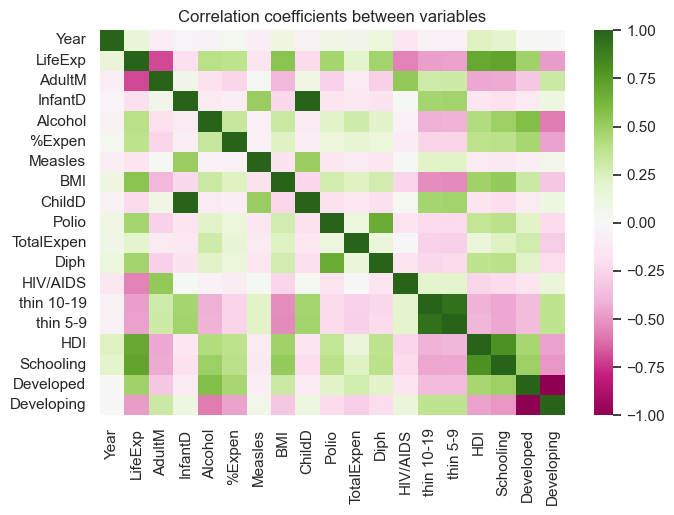

In [223]:
# Heatmap of pairwise correlation coefficients between variables
sns.set(rc={'figure.figsize':(7.5,5)})
sns.heatmap(life_exp.iloc[:,1:].corr(), cmap='PiYG')
plt.title('Correlation coefficients between variables')
plt.show()

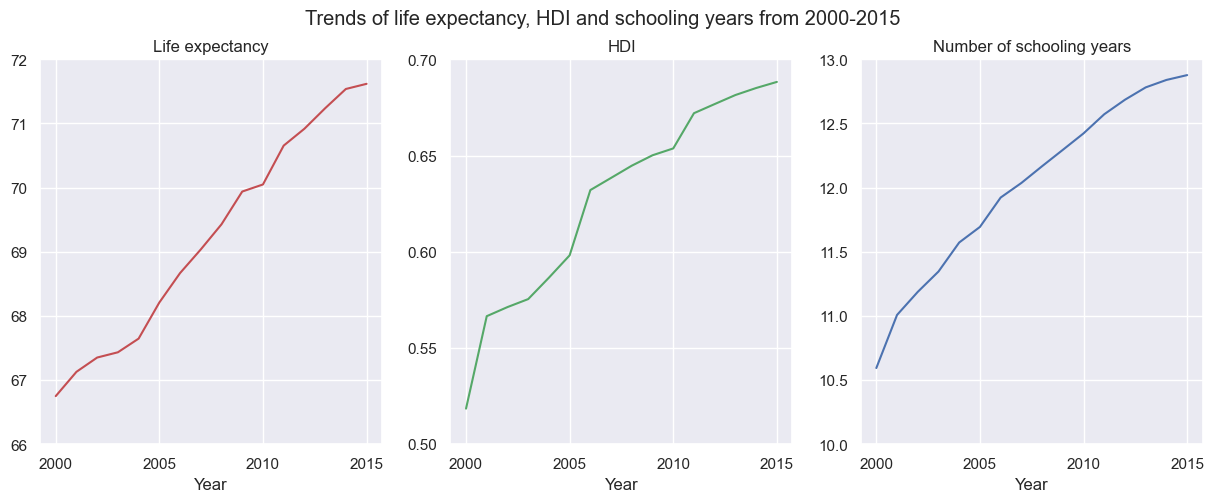

In [224]:
# Plotting trends of average life expectancy, HDI and schooling years from 2000-2015
temp = life_exp[['LifeExp','HDI','Schooling','Year']].groupby('Year').mean().reset_index()
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5), sharex=True)
fig.suptitle('Trends of life expectancy, HDI and schooling years from 2000-2015')
plt.xticks(np.array([2000,2005,2010,2015])) 
ax1.plot(temp['Year'], temp['LifeExp'], 'r')
ax1.set_title('Life expectancy')
ax1.yaxis.set_ticks(np.array([66,67,68,69,70,71,72]))
ax1.set_xlabel('Year')
ax2.plot(temp['Year'], temp['HDI'], 'g')
ax2.set_title('HDI')
ax2.yaxis.set_ticks(np.array([0.50,0.55,0.60,0.65,0.70]))
ax2.set_xlabel('Year')
ax3.plot(temp['Year'], temp['Schooling'])
ax3.set_title('Number of schooling years')
ax3.yaxis.set_ticks(np.array([10.0,10.5,11.0,11.5,12.0,12.5,13.0]))
ax3.set_xlabel('Year')
plt.show()

#### Average life expectancy, HDI and number of schooling years have increased from 2000-2015.

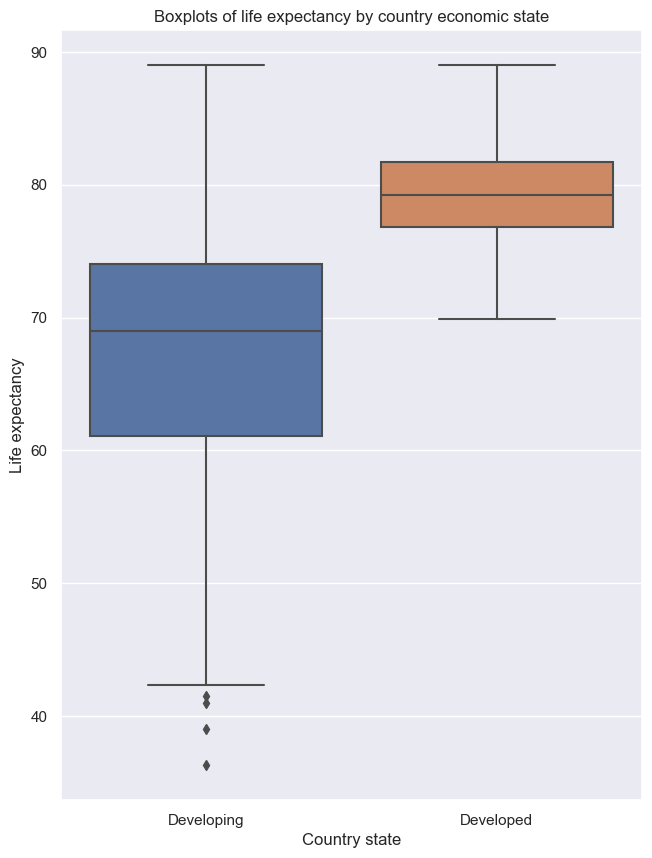

In [226]:
# Boxplot for life expectancy according to country state
sns.set(rc={'figure.figsize':(7.5,10)})
fig = sns.boxplot(data=life_exp, x='Developed', y='LifeExp')
plt.title('Boxplots of life expectancy by country economic state')
fig.set(xlabel='Country state', ylabel='Life expectancy')
fig.set_xticklabels(['Developing','Developed'])
plt.show()

#### Developing countries have much greater variance in life expectancy, while developed countries have higher median life expectancy.

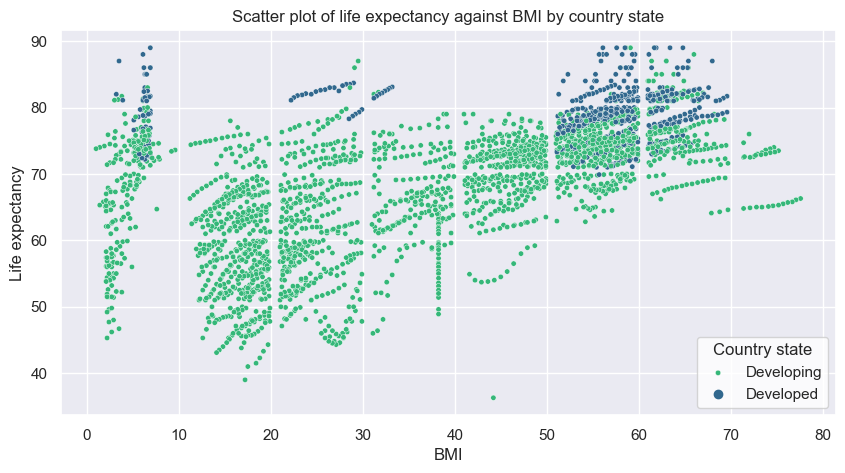

In [228]:
# Scatter plot for life expectancy and BMI, according to country state
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.scatterplot(data=life_exp, x='BMI', y='LifeExp', hue='Developing', palette='viridis', s=15)
sns.set_style("white", {'axes.grid' : False})
plt.title('Scatter plot of life expectancy against BMI by country state')
plt.ylabel('Life expectancy')
plt.legend(title='Country state', loc='lower right', labels=['Developing','Developed'])
plt.show()

#### Both developing and developed countries have varying BMI values. There seems to be a positive correlation between BMI and life expectancy for developing countries (green). Though there are many more developing countries than developed, higher BMI values (>50) are equally represented between the 2, suggesting also the positive correlation between BMI and economy state.

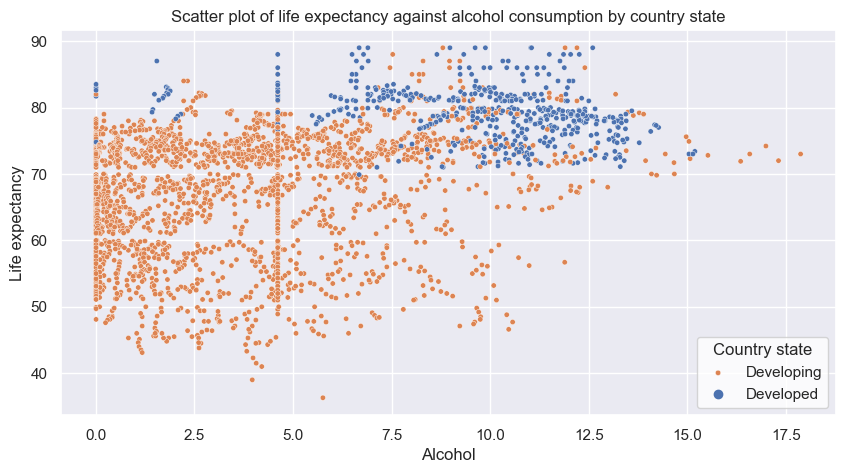

In [230]:
# Scatter plot for life expectancy and alcohol consumption, according to country state
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.scatterplot(data=life_exp, x='Alcohol', y='LifeExp', hue='Developing', palette='deep', s=15)
sns.set_style("white", {'axes.grid' : False})
plt.title('Scatter plot of life expectancy against alcohol consumption by country state')
plt.ylabel('Life expectancy')
plt.legend(title='Country state', loc='lower right', labels=['Developing','Developed'])
plt.show()

#### There also seems to be a positive correlation between alcohol consumption and life expectancy for developing countries. However, life expectancy is highest when alcohol consumption is around 7.5-12.5 litres for both developing and developed countries, slightly dipping when alcohol consumption goes above 12.5 litres.

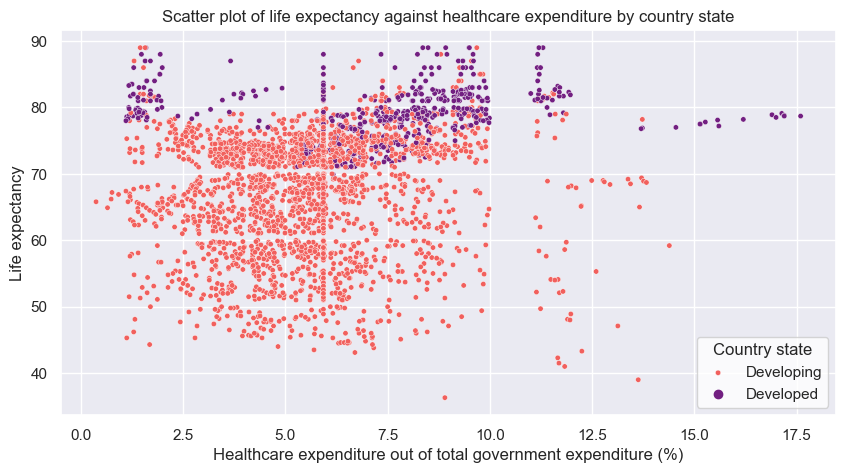

In [232]:
# Scatter plot for life expectancy and healthcare expenditure, according to country state
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.scatterplot(data=life_exp, x='TotalExpen', y='LifeExp', hue='Developing', palette='magma', s=15)
sns.set_style("white", {'axes.grid' : False})
plt.title('Scatter plot of life expectancy against healthcare expenditure by country state')
plt.ylabel('Life expectancy')
plt.xlabel('Healthcare expenditure out of total government expenditure (%)')
plt.legend(title='Country state', loc='lower right', labels=['Developing','Developed'])
plt.show()

#### No obvious correlation can be identified between healthcare expenditure as a percentage of total government expenditure and life expectancy for both developed and developing countries.

## Developing regression models to predict life expectancy and evaluation

### Predicting life expectancy with adult mortality rate

In [236]:
# Creating numpy array of life expectancy values from dataframe, saving as Y
Y = life_exp['LifeExp'].to_numpy()
Y[:5]

array([65. , 59.9, 59.9, 59.5, 59.2])

In [237]:
# Creating numpy array of adult mortality values from dataframe, saving as X
X = life_exp['AdultM'].to_numpy()
X[:5]

array([263., 271., 268., 272., 275.])

In [238]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [239]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_[0])
print ('Intercept: ',linreg.intercept_)

Coefficients:  -0.05295781946301084
Intercept:  78.01081106750708


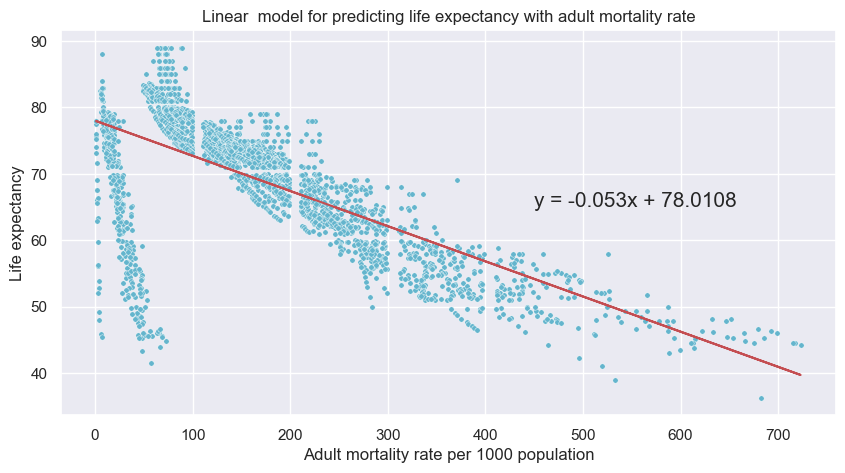

In [240]:
# Visualise model on scatter plot
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x=life_exp['AdultM'], y=life_exp['LifeExp'], color='c', s=15)
sns.set_style("white", {'axes.grid' : False})
plt.plot(X_train, linreg.coef_[0]*X_train + linreg.intercept_, '-r')
plt.xlabel("Adult mortality rate per 1000 population")
plt.ylabel("Life expectancy")
plt.title('Linear  model for predicting life expectancy with adult mortality rate')
plt.text(450, 65,f'y = {round(linreg.coef_[0],4)}x + {round(linreg.intercept_,4)}', fontsize='15')
plt.show()

In [241]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 45.2785 and R squared coefficient of 0.4844.


In [242]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 52.4319 and R squared coefficient of 0.485.


### Predicting life expectancy with number of schooling years

In [244]:
# Creating numpy array of number of schooling years from dataframe, saving as X
X = life_exp['Schooling'].to_numpy()
X[:5]

array([10.1, 10. ,  9.9,  9.8,  9.5])

In [245]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [246]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_[0])
print ('Intercept: ',linreg.intercept_)

Coefficients:  2.0618924828267757
Intercept:  44.46282251005161


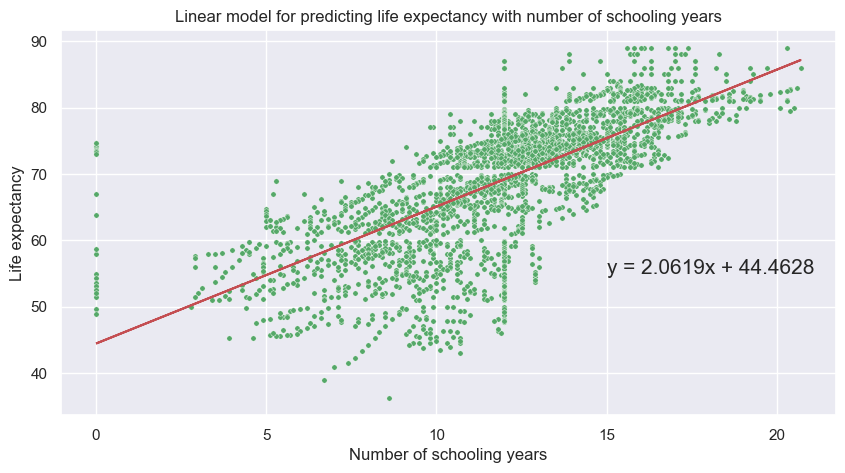

In [247]:
# Visualise model on scatter plot
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x=life_exp['Schooling'], y=life_exp['LifeExp'], color='g', s=15)
sns.set_style("white", {'axes.grid' : False})
plt.plot(X_train, linreg.coef_[0]*X_train + linreg.intercept_, '-r')
plt.xlabel("Number of schooling years")
plt.ylabel("Life expectancy")
plt.title('Linear model for predicting life expectancy with number of schooling years')
plt.text(15, 55,f'y = {round(linreg.coef_[0],4)}x + {round(linreg.intercept_,4)}', fontsize='15')
plt.show()

In [248]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 44.5086 and R squared coefficient of 0.5073.


In [249]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 41.3059 and R squared coefficient of 0.551.


### Predicting life expectancy with multiple variables (All variables)

In [251]:
# Creating subset containing predictors from dataframe, standardising and converting to numpy array, saving as X
X = life_exp.drop(columns=['Country','LifeExp'], inplace=False)
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 1.62697843,  0.79023802,  0.26751977, ..., -0.58394089,
        -0.46034827,  0.46034827],
       [ 1.41004798,  0.85461353,  0.2844554 , ..., -0.61468047,
        -0.46034827,  0.46034827],
       [ 1.19311752,  0.83047271,  0.30139102, ..., -0.64542005,
        -0.46034827,  0.46034827],
       ...,
       [-1.19311752, -0.73868044, -0.04578922, ..., -0.61468047,
        -0.46034827,  0.46034827],
       [-1.41004798,  4.19409332, -0.04578922, ..., -0.67615962,
        -0.46034827,  0.46034827],
       [-1.62697843,  4.02510759, -0.05425703, ..., -0.67615962,
        -0.46034827,  0.46034827]])

In [252]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [253]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_)
print ('Intercept: ',linreg.intercept_)

Coefficients:  [-1.00768126e-02 -2.46828375e+00  1.14371519e+01  1.37596038e-01
  5.51774283e-01 -2.98400758e-01  8.22420993e-01 -1.15302503e+01
  5.81501450e-01  1.86996783e-01  8.04771528e-01 -2.39879098e+00
 -3.06787125e-01 -1.06583495e-01  1.14290596e+00  2.27689969e+00
  3.17765802e-01 -3.17765802e-01]
Intercept:  69.21896111567925


In [254]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 15.9681 and R squared coefficient of 0.8229.


In [255]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 18.1966 and R squared coefficient of 0.8038.


### Predicting life expectancy with multiple variables (excluding country economy status)

In [257]:
# Creating subset containing predictors from dataframe, standardising and converting to numpy array, saving as X
X = life_exp.drop(columns=['Country','LifeExp','Developed','Developing'], inplace=False)
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 1.62697843,  0.79023802,  0.26751977, ...,  2.76945433,
        -0.72365626, -0.58394089],
       [ 1.41004798,  0.85461353,  0.2844554 , ...,  2.81405613,
        -0.73828359, -0.61468047],
       [ 1.19311752,  0.83047271,  0.30139102, ...,  2.85865792,
        -0.76753824, -0.64542005],
       ...,
       [-1.19311752, -0.73868044, -0.04578922, ..., -0.79868943,
        -0.97719657, -0.61468047],
       [-1.41004798,  4.19409332, -0.04578922, ..., -0.70948584,
        -0.97719657, -0.67615962],
       [-1.62697843,  4.02510759, -0.05425703, ...,  1.40909952,
        -0.94306614, -0.67615962]])

In [258]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [259]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_)
print ('Intercept: ',linreg.intercept_)

Coefficients:  [ -0.07790249  -2.49501093  11.51581969   0.43398813   0.68968286
  -0.22608637   0.85162928 -11.65719228   0.6375073    0.15268994
   0.80063956  -2.30931142  -0.33814822  -0.04103537   1.29442281
   2.34405824]
Intercept:  69.22205880146365


In [260]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 16.4849 and R squared coefficient of 0.818.


In [261]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 17.0596 and R squared coefficient of 0.8119.


### Predicting life expectancy with multiple variables (Adult, infant and child mortality rate)

In [263]:
# Creating subset containing predictors from dataframe, standardising and converting to numpy array, saving as X
X = life_exp[['AdultM','InfantD','ChildD']]
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 0.79023802,  0.26751977,  0.25406055],
       [ 0.85461353,  0.2844554 ,  0.272732  ],
       [ 0.83047271,  0.30139102,  0.29140345],
       ...,
       [-0.73868044, -0.04578922, -0.01356358],
       [ 4.19409332, -0.04578922, -0.0197874 ],
       [ 4.02510759, -0.05425703, -0.0197874 ]])

In [264]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [265]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_)
print ('Intercept: ',linreg.intercept_)

Coefficients:  [ -6.12193715  22.35260537 -23.81384043]
Intercept:  69.2922943585271


In [266]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 40.5222 and R squared coefficient of 0.5498.


In [267]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 44.6103 and R squared coefficient of 0.5221.


### Predicting life expectancy with multiple variables (Measles cases, HIV/AIDS child death, Polio and Diphtheria immunization)

In [269]:
# Creating subset containing predictors from dataframe, standardising and converting to numpy array, saving as X
X = life_exp[['Measles','HIV/AIDS','Polio','Diph']]
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-0.11092432, -0.32405456, -3.28018754, -0.73316488],
       [-0.16856969, -0.32405456, -1.0519244 , -0.8601461 ],
       [-0.1739685 , -0.32405456, -0.88051954, -0.77549195],
       ...,
       [-0.18494028,  7.48372245, -0.40915618, -0.47920243],
       [-0.16534782,  7.93606218, -0.28060254, -0.30989413],
       [-0.08227578,  8.2113994 , -0.19490011, -0.18291291]])

In [270]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [271]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_)
print ('Intercept: ',linreg.intercept_)

Coefficients:  [-0.77234574 -4.37480725  2.04496587  2.40735893]
Intercept:  69.3462249979255


In [272]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 45.8321 and R squared coefficient of 0.4945.


In [273]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 46.553 and R squared coefficient of 0.4844.


### Predicting life expectancy with multiple variables (Adult mortality, BMI, HDI)

In [275]:
# Creating subset containing predictors from dataframe, standardising and converting to numpy array, saving as X
X = life_exp[['AdultM','BMI','HDI']]
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 0.79023802, -0.96415539, -0.72365626],
       [ 0.85461353, -0.98934838, -0.73828359],
       [ 0.83047271, -1.01454136, -0.76753824],
       ...,
       [-0.73868044, -0.6013764 , -0.97719657],
       [ 4.19409332, -0.62153079, -0.97719657],
       [ 4.02510759, -0.64168518, -0.94306614]])

In [276]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [277]:
# Creating linear regression model and fit to training set
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Model parameters
print ('Coefficients: ', linreg.coef_)
print ('Intercept: ',linreg.intercept_)

Coefficients:  [-4.16658546  1.81186855  4.00820721]
Intercept:  69.20839532412461


In [278]:
# Evaluating accuracy of model on training set
Y_pred = linreg.predict(X_train)
mse = mean_squared_error(Y_train,Y_pred)
rsq = r2_score(Y_train,Y_pred)
print(f'On the training set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the training set, the model has mean squared error of 27.7866 and R squared coefficient of 0.7007.


In [279]:
# Predicting values of testing set with model and checking accuracy
Y_pred = linreg.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
rsq = r2_score(Y_test,Y_pred)
print(f'On the testing set, the model has mean squared error of {round(mse,4)} and R squared coefficient of {round(rsq,4)}.')

On the testing set, the model has mean squared error of 25.5884 and R squared coefficient of 0.6876.


## (Additional exploration) Developing classification models to predict economy status and evaluation

### Predicting economy status using logistic regression involving all variables

In [282]:
# Reverse one hot encoding of economy status
temp = pd.from_dummies(life_exp[['Developed','Developing']])
temp.columns = ['Status']
life_exp = life_exp.drop(columns=['Developed','Developing']).join(temp)
life_exp.head()

,Country,Year,LifeExp,AdultM,InfantD,Alcohol,%Expen,Measles,BMI,ChildD,Polio,TotalExpen,Diph,HIV/AIDS,thin 10-19,thin 5-9,HDI,Schooling,Status
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,Developing
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,Developing
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,Developing
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,Developing
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,Developing


In [283]:
# Creating numpy array of economy statuses from dataframe, saving as Y
Y = life_exp['Status'].to_numpy()
Y[:5]

array(['Developing', 'Developing', 'Developing', 'Developing',
       'Developing'], dtype=object)

In [284]:
# Creating subset containing predictors from dataframe, standardising and converting to numpy array, saving as X
X = life_exp.drop(columns=['Country','Status'], inplace=False)
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[ 1.62697843, -0.4436909 ,  0.79023802, ...,  2.76945433,
        -0.72365626, -0.58394089],
       [ 1.41004798, -0.97927911,  0.85461353, ...,  2.81405613,
        -0.73828359, -0.61468047],
       [ 1.19311752, -0.97927911,  0.83047271, ...,  2.85865792,
        -0.76753824, -0.64542005],
       ...,
       [-1.19311752, -2.56504028, -0.73868044, ..., -0.79868943,
        -0.97719657, -0.61468047],
       [-1.41004798, -2.51253163,  4.19409332, ..., -0.70948584,
        -0.97719657, -0.67615962],
       [-1.62697843, -2.43901952,  4.02510759, ...,  1.40909952,
        -0.94306614, -0.67615962]])

In [285]:
# Splitting arrays into training and testing set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'The training set has {Y_train.shape[0]} entries while the testing set has {Y_test.shape[0]} entries.')

The training set has 2342 entries while the testing set has 586 entries.


In [286]:
# Creating logistic regression model and fit to training set, involving cross-validation and tuning parameters
# Best parameters and accuracy are shown
parameters ={ 'C': np.arange(0.01,0.5,0.01),'penalty':['l2'], 'solver':['lbfgs']}
logreg=LogisticRegression()
logreg_cv = GridSearchCV(logreg, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.23, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.933386070194581


In [287]:
# Classification report of results
Y_pred = logreg_cv.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

   Developed       0.81      0.76      0.79        89
  Developing       0.96      0.97      0.96       497

    accuracy                           0.94       586
   macro avg       0.88      0.87      0.87       586
weighted avg       0.94      0.94      0.94       586



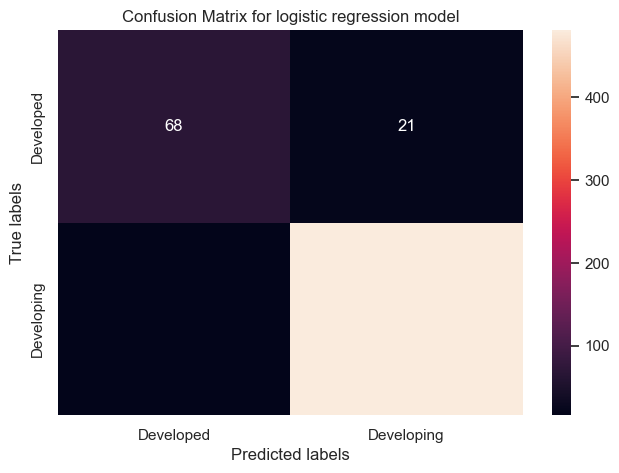

In [288]:
# Confusion matrix 
def plot_confusion_matrix(y,y_predict):
    sns.set(rc={'figure.figsize':(7.5,5)})
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for logistic regression model'); 
    ax.xaxis.set_ticklabels(['Developed', 'Developing']); ax.yaxis.set_ticklabels(['Developed', 'Developing']) 
    plt.show() 
plot_confusion_matrix(Y_test,Y_pred)

In [289]:
# Model score
logreg_score = logreg_cv.score(X_test,Y_test)
logreg_score

0.9368600682593856

### Predicting economy status using support vector machine involving all variables

In [291]:
# Creating SVM model and fit to training set, involving cross-validation and tuning parameters
# Best parameters and accuracy are shown
parameters = {'kernel':('rbf','poly','sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=2)
svm_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.9457728437233135


In [292]:
# Classification report of results
Y_pred = logreg_cv.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

   Developed       0.81      0.76      0.79        89
  Developing       0.96      0.97      0.96       497

    accuracy                           0.94       586
   macro avg       0.88      0.87      0.87       586
weighted avg       0.94      0.94      0.94       586



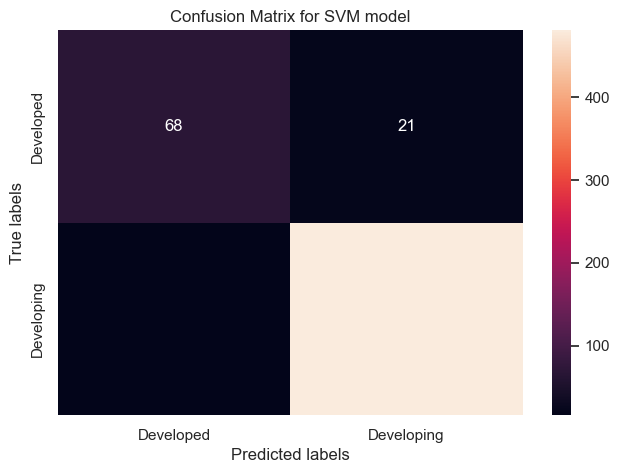

In [293]:
# Confusion matrix 
def plot_confusion_matrix(y,y_predict):
    sns.set(rc={'figure.figsize':(7.5,5)})
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for SVM model'); 
    ax.xaxis.set_ticklabels(['Developed', 'Developing']); ax.yaxis.set_ticklabels(['Developed', 'Developing']) 
    plt.show() 
plot_confusion_matrix(Y_test,Y_pred)

In [294]:
# Model score
svm_score = svm_cv.score(X_test,Y_test)
svm_score

0.9590443686006825

### Predicting economy status using decision trees involving all variables

In [296]:
# Creating decision tree model and fit to training set, involving cross-validation and tuning parameters
# Best parameters and accuracy are shown
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1,10)], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9683997090380068


In [297]:
# Classification report of results
Y_pred = logreg_cv.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

   Developed       0.81      0.76      0.79        89
  Developing       0.96      0.97      0.96       497

    accuracy                           0.94       586
   macro avg       0.88      0.87      0.87       586
weighted avg       0.94      0.94      0.94       586



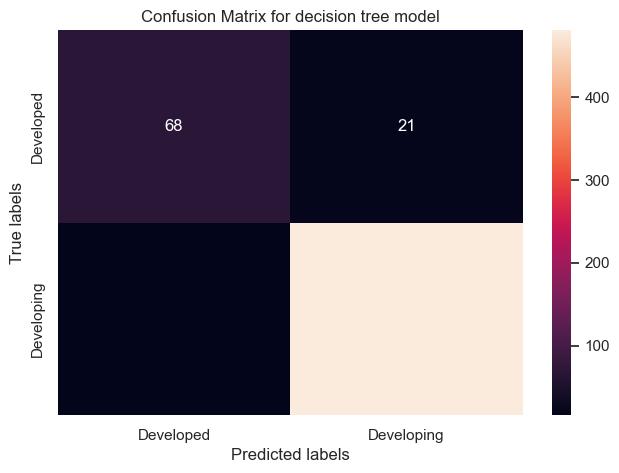

In [298]:
# Confusion matrix 
def plot_confusion_matrix(y,y_predict):
    sns.set(rc={'figure.figsize':(7.5,5)})
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for decision tree model'); 
    ax.xaxis.set_ticklabels(['Developed', 'Developing']); ax.yaxis.set_ticklabels(['Developed', 'Developing']) 
    plt.show() 
plot_confusion_matrix(Y_test,Y_pred)

In [299]:
# Model score
tree_score = tree_cv.score(X_test,Y_test)
tree_score

0.9812286689419796

### Predicting economy status using K-nearest neighbours model involving all variables

In [301]:
# Creating kNN model and fit to training set, involving cross-validation and tuning parameters
# Best parameters and accuracy are shown
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.9718166939443534


In [302]:
# Classification report of results
Y_pred = logreg_cv.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

   Developed       0.81      0.76      0.79        89
  Developing       0.96      0.97      0.96       497

    accuracy                           0.94       586
   macro avg       0.88      0.87      0.87       586
weighted avg       0.94      0.94      0.94       586



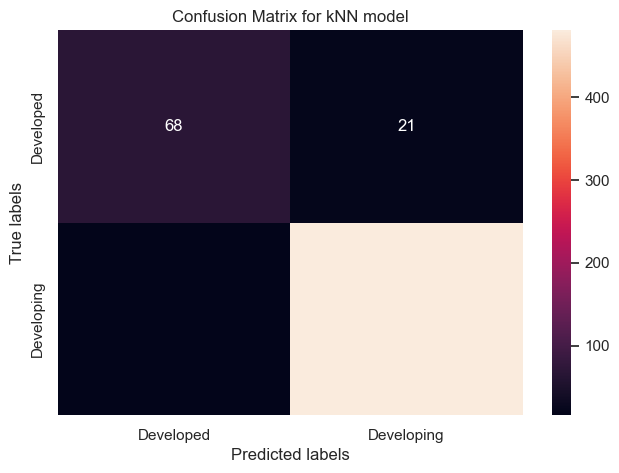

In [303]:
# Confusion matrix 
def plot_confusion_matrix(y,y_predict):
    sns.set(rc={'figure.figsize':(7.5,5)})
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for kNN model'); 
    ax.xaxis.set_ticklabels(['Developed', 'Developing']); ax.yaxis.set_ticklabels(['Developed', 'Developing']) 
    plt.show() 
plot_confusion_matrix(Y_test,Y_pred)

In [304]:
# Model score
knn_score = knn_cv.score(X_test,Y_test)
knn_score

0.9675767918088737

In [305]:
# Score table
scores_df = pd.DataFrame({'Model':['Logistic regression','SVM','Decision tree','kNN'], 'Test score':[logreg_score,svm_score,tree_score,knn_score]})
scores_df

,Model,Test score
0,Logistic regression,0.936860
1,SVM,0.959044
2,Decision tree,0.981229
3,kNN,0.967577
